<a href="https://colab.research.google.com/github/handoyo1712/Trending-Youtube-EDA-/blob/main/Trending_Youtube_VIdeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
os.listdir('drive/MyDrive/Dataset')

['trendring_YT_video_US.csv']

### **Load dataset**

In [3]:
df_trenvideo = pd.read_csv("drive/MyDrive/Dataset/trendring_YT_video_US.csv")

In [4]:
df_trenvideo.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [5]:
df_trenvideo.info() #terindikasi terdapat null value pada kolom description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df_trenvideo.isnull().sum() # benar, terdapat null value pada kolom description

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [7]:
#tinjau kolom yang memiliki missing value
df_trenvideo[df_trenvideo['description'].isnull()].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


### **Data Processing**

In [8]:
# fill null values and repair data formats
# mengisi null value dan memperbaiki format data
df_trenvideo['description'] = df_trenvideo['description'].replace(np.NaN,"No description")
df_trenvideo['new_tags'] = df_trenvideo['tags'].replace('[none]','No tags')
df_trenvideo['new_tags'] = df_trenvideo['tags'].str.replace(r'"','')
df_trenvideo['new_tags'] = df_trenvideo['new_tags'].str.replace(r'\|',',')

# change in to datetime type
# mengubah kedalam type datetime
df_trenvideo['trending_date'] = pd.to_datetime(df_trenvideo['trending_date'], format='%y.%d.%m')
df_trenvideo['publish_time'] = pd.to_datetime(df_trenvideo['publish_time'], format='%Y-%m-%d %H:%M:%S.%f')
df_trenvideo['publish_date'] = [d.date() for d in df_trenvideo['publish_time']]
df_trenvideo['publish_clock'] = [d.time() for d in df_trenvideo['publish_time']]

# create three columns , using dt function to extract dayofweek, hour and month
df_trenvideo["publish_day_week"] = [d.dayofweek for d in df_trenvideo['publish_time']]
df_trenvideo["publish_month"] = [d.month for d in df_trenvideo['publish_time']]
df_trenvideo['publish_hour'] = [d.hour for d in df_trenvideo['publish_time']]


In [9]:
df_trenvideo.info()
print("Mising value is clear")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [10]:
# changed format data type in to datetime
# mengubah format type data kedalan datetime
df_trenvideo['publish_date'] =pd.to_datetime(df_trenvideo['publish_date'],format='%Y-%m-%d')
df_trenvideo['publish_clock']=pd.to_datetime(df_trenvideo['publish_clock'],format='%H:%M:%S')

In [11]:
# create a new columns "bins_publis_clock", to grouping times become six
bins = np.linspace(min(df_trenvideo['publish_clock'].dt.hour),max(df_trenvideo['publish_clock'].dt.hour),7)
group_labels = ["Last night", "Morning1","Morning2","Afternoon","Evening","Night" ]
df_trenvideo['bins_publish_clock']=pd.cut(df_trenvideo['publish_clock'].dt.hour,bins, labels=group_labels,include_lowest=True)
df_trenvideo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,new_tags,publish_date,publish_clock,publish_day_week,publish_month,publish_hour,bins_publish_clock
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,SHANtell martin,2017-11-13,1900-01-01 17:13:01,0,11,17,Evening
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...","last week tonight trump presidency,last week t...",2017-11-13,1900-01-01 07:30:00,0,11,7,Morning1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"racist superman,rudy,mancuso,king,bach,racist,...",2017-11-12,1900-01-01 19:05:24,6,11,19,Evening
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,"rhett and link,gmm,good mythical morning,rhett...",2017-11-13,1900-01-01 11:00:04,0,11,11,Morning2
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,"ryan,higa,higatv,nigahiga,i dare you,idy,rhpc,...",2017-11-12,1900-01-01 18:01:41,6,11,18,Evening


In [12]:
df_trenvideo['bins_publish_clock'].value_counts()

Evening       12137
Afternoon      9946
Night          7694
Last night     4634
Morning1       3746
Morning2       2792
Name: bins_publish_clock, dtype: int64

**Keterangan** \
bins:\
pukul 15.33 - 19.17 = Evening \
pukul 11.05 - 15.33 = Afternoon \
pukul 19.17 - 23.00 = Night \
pukul 00.03 - 4.23 = Last Night \
pukul 04.23 - 08.07 = Morning1 \
pukul 08.07 -11.05 = Morning2 

In [17]:
df_trenvideo['publish_clock'] = [d.time() for d in df_trenvideo['publish_time']]

#df_trenvideo.head()

### **Tables**

In [ ]:
original_table = pd.read_csv("drive/MyDrive/Dataset/trendring_YT_video_US.csv")
process_table = df_trenvideo
New_table = df_trenvideo[['video_id','title','channel_title','new_tags','category_id',
                          'trending_date','publish_time','publish_date', 'publish_times',
                          'bins_publish_times','views','likes','dislikes',
                          'comment_count', 'comments_disabled','ratings_disabled',
                          'video_error_or_removed']]

In [ ]:
# fungsi detail table
def show_tabel_details(table):
  x="=="
  print(x*50)
  print("dimenssion table:\n")
  print(table.shape)
  print(x*50)
  print("Info table:\n")
  print(table.info())
  print(x*50)
  print("head of table:\n")
  print(table.head())
  return

In [ ]:
#ORIGINAL TABLE
show_tabel_details(original_table)

dimenssion table:

(40949, 16)
Info table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_erro

In [ ]:
# PROCESS TABLE
show_tabel_details(process_table)

dimenssion table:

(40949, 20)
Info table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 1

In [ ]:
#New Table
show_tabel_details(New_table)

dimenssion table:

(40949, 17)
Info table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   title                   40949 non-null  object             
 2   channel_title           40949 non-null  object             
 3   new_tags                40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   trending_date           40949 non-null  datetime64[ns]     
 6   publish_time            40949 non-null  datetime64[ns, UTC]
 7   publish_date            40949 non-null  datetime64[ns]     
 8   publish_times           40949 non-null  object             
 9   bins_publish_times      40949 non-null  category           
 10  views                   40949 non-null  int64              
 1

In [ ]:
New_table.head()

,video_id,title,channel_title,new_tags,category_id,trending_date,publish_time,publish_date,publish_times,bins_publish_times,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,22,2017-11-14,2017-11-13 17:13:01+00:00,2017-11-13,17:13:01,Evening,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency,last week t...",24,2017-11-14,2017-11-13 07:30:00+00:00,2017-11-13,07:30:00,Morning1,2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman,rudy,mancuso,king,bach,racist,...",23,2017-11-14,2017-11-12 19:05:24+00:00,2017-11-12,19:05:24,Evening,3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link,gmm,good mythical morning,rhett...",24,2017-11-14,2017-11-13 11:00:04+00:00,2017-11-13,11:00:04,Morning2,343168,10172,666,2146,False,False,False
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,"ryan,higa,higatv,nigahiga,i dare you,idy,rhpc,...",24,2017-11-14,2017-11-12 18:01:41+00:00,2017-11-12,18:01:41,Evening,2095731,132235,1989,17518,False,False,False


**Catatan :**\
\
***original_table*** adalah tabel awal yang belum di format atau sumber tabel.\
\
***Process_table*** adalah tabel yang sudah bersih dari missing value, beberapa kolom seperti trending_date, tags, descriptions, publish_date sudah di ubah kedalam format yang sudah ditentukan secara subjektif yang sesuai dengan standar agar data bisa di olah lebih lanjut.\
\
***New_table*** adalah tabel dari process_table yang sudah di reduksi sesuai dengan kolom yang akan digunakan pada proses selanjutnya.


**Video_id** is unique value for every **title's column**\
**title** is video's title which have published.\
**channel_title** is the owner which have published videos.\
**New_tags** is equal for **tags column** in original_table, **New_tags** serves more view,comment and like \
**trending_date** is date when video has been trending.

### **Explolatory Data Analysis (EDA)**

In [16]:
#Looking for Nulls and type of our data
df_trenvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [18]:
df_trenvideo.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,new_tags,publish_date,publish_day_week,publish_month,publish_hour,bins_publish_clock,publish_clock
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,SHANtell martin,2017-11-13,0,11,17,Evening,17:13:01
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...","last week tonight trump presidency,last week t...",2017-11-13,0,11,7,Morning1,07:30:00
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"racist superman,rudy,mancuso,king,bach,racist,...",2017-11-12,6,11,19,Evening,19:05:24


In [19]:
data = df_trenvideo

Text(0, 0.5, 'Total Views')

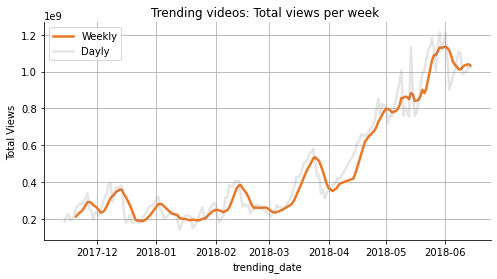

In [22]:
# groupby trending date by views
time = data.groupby("trending_date")["views"].sum()


# let,s plot using rolling (7 -> week)
plt.figure(figsize=(8,4))
sns.lineplot(data=time.rolling(7).mean(), linewidth=2.5,color="#EB7827",label="Weekly")
sns.lineplot(data=time, linewidth=2.5,color="grey",alpha=0.2,label="Dayly")
# using plt.grid and sns.despine you get a cleaner look in the graphics
plt.grid(None)
sns.despine()
plt.title("Trending videos: Total views per week ")
plt.ylabel("Total Views")

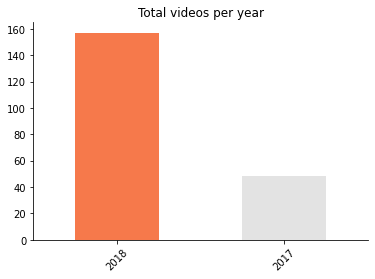

In [28]:
# Let's check how many videos there are per year in the dataset; using the same dataframe as before (Time) and reset_index, to facilitate their visualization.
year = time.reset_index()

#now with reset_index I have two columns, the number of views and trending_date; as before I use the dt.year function to extract the year and value_counts to count them.
year_count = year.trending_date.dt.year.value_counts()
year_count.plot(kind="bar",color=["#F6794B","#E3E3E3"])
plt.xticks(rotation=45)
plt.title("Total videos per year")
sns.despine()

Most videos belong to 2018!

Let's continue with time charts; let's see what day, month and time the videos \are usually published!

First I group the views by day of the week; then I create a dictionary with the days of the week to convert the numbers into strings and make the display more enjoyable

In [34]:
print(data['publish_day_week'].value_counts())

4    7002
3    6950
1    6786
2    6762
0    6177
6    3679
5    3593
Name: publish_day_week, dtype: int64


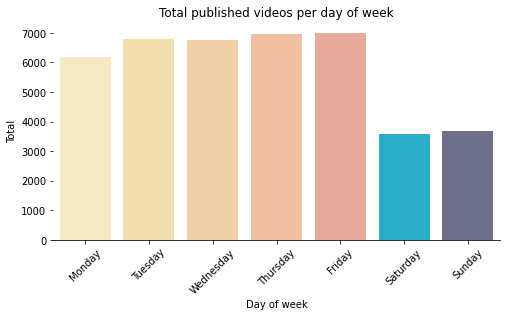

In [29]:
# creating a dict
numeros = [*range(7)]
day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dict_day = {}
for key,item in zip(day,numeros):
   dict_day[item] = key
# groupby by day of week
day_week = data.groupby("publish_day_week").size().reset_index()
# apply dict to publish day week column using map
day_week["publish_day_week"] = day_week["publish_day_week"].map(dict_day)

# let,s plot ¡¡
plt.figure(figsize=(8,4))
colors = ["#FAEFBE","#FAE0A7","#FAD19E","#FABC96","#EFA492","#18BADA","#6B6D8C"]
sns.barplot(x="publish_day_week",y=0,data=day_week,palette=colors,saturation=0.8)
plt.title("Total published videos per day of week")
plt.xlabel("Day of week")
plt.ylabel("Total")
plt.xticks(rotation=45)
sns.despine(left=True)

We see that on weekends the Youtubers tend to rest and they tend to upload more videos on Thursday and Friday. Now I will do the same but with the months of the year

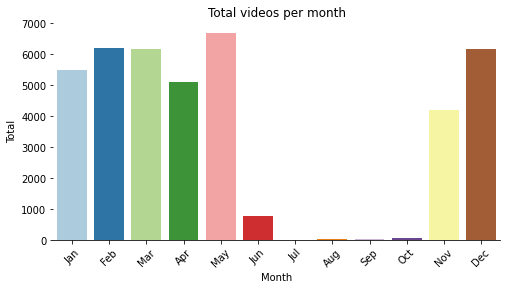

In [ ]:
number = [*range(1,13)]
month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

dict_month = {}
for key,item in zip(month,number):
   dict_month[item] = key

month_df = data.groupby("publish_month").size().reset_index()

month_df["publish_month"] = month_df["publish_month"].map(dict_month)

plt.figure(figsize=(8,4))

sns.barplot(x="publish_month",y=0,data=month_df,palette="Paired",saturation=0.8)
plt.xlabel("Month")
plt.ylabel("Total")
plt.title("Total videos per month")
plt.xticks(rotation=45)
sns.despine(left=True)

the summer months people prefer to go to the beach or the mountains instead of uploading videos, and it makes a lot of sense, you have to enjoy the good weather!

And finally, let's see what time the Youtubers usually upload their videos!

Text(0.5, 1.0, 'Number of videos uploaded per hour')

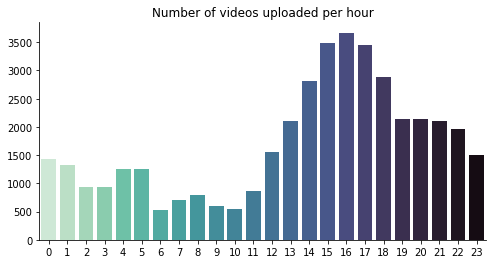

In [ ]:
hour = data.groupby("publish_hour").size()

plt.figure(figsize=(8,4))
sns.barplot(x=hour.index.values,y=hour.values,palette="mako_r")
sns.despine()
plt.title("Number of videos uploaded per hour")

Text(0.5, 1.0, 'Number of videos uploaded per category')

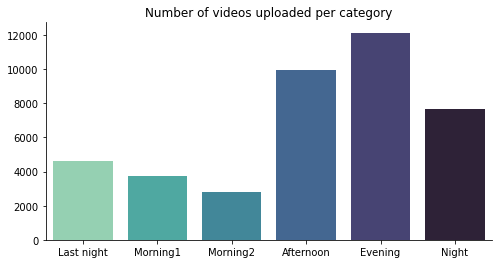

In [45]:
clock_category = data.groupby("bins_publish_clock").size()
plt.figure(figsize=(8,4))
sns.barplot(x=clock_category.index.values,y=clock_category.values,palette="mako_r")
sns.despine()
plt.title("Number of videos uploaded per category")

There are many Youtubers who do not sleep at night! The truth is that the night is when it is quieter, there are fewer distractions and noise.

### **Channels, Youtubers** 

There is a column in our dataframe called category_id but they are numbers; luckily there is a Json file, where we can find the video categories. Let's create, as we did before with the dates, a dictionary of video categories!

In [35]:
#Create a new column
data['category_name'] = np.nan

data.loc[(data["category_id"] == 1),"category_name"] = 'Film and Animation'
data.loc[(data["category_id"] == 15),"category_name"] = 'Pets and Animals'
data.loc[(data["category_id"] == 17),"category_name"] = 'Sport'
data.loc[(data["category_id"] == 19),"category_name"] = 'Travel and Events'
data.loc[(data["category_id"] == 20),"category_name"] = 'Gaming'
data.loc[(data["category_id"] == 22),"category_name"] = 'People and Blogs'
data.loc[(data["category_id"] == 23),"category_name"] = 'Comedy'
data.loc[(data["category_id"] == 24),"category_name"] = 'Entertainment'
data.loc[(data["category_id"] == 25),"category_name"] = 'News and Politics'
data.loc[(data["category_id"] == 26),"category_name"] = 'How to and Style'
data.loc[(data["category_id"] == 27),"category_name"] = 'Education'
data.loc[(data["category_id"] == 28),"category_name"] = 'Science and Technology'
data.loc[(data["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
data.loc[(data["category_id"] == 25),"category_name"] = 'News & Politics'

In [36]:
# let's see what percentage of videos per category are in our dataframe. First, with value_counts and normalize we get the relative frequency
categorys = data["category_name"].value_counts(normalize=True).reset_index()
# rename columns names
categorys.rename(columns={"index":"Category","category_name":"Percentage"},inplace=True)
# get percentage
categorys["Percentage"] = round(categorys["Percentage"] *100,2)
# we use style background ¡
categorys.style.background_gradient(cmap='mako_r')

,Category,Percentage
0,Entertainment,29.270000
1,How to and Style,12.180000
2,Comedy,10.160000
3,People and Blogs,9.430000
4,News & Politics,7.310000
5,Science and Technology,7.050000
6,Film and Animation,6.890000
7,Sport,6.390000
8,Education,4.870000
9,Pets and Animals,2.700000


Forty percent of the videos belong to the categories How to and style and Enterteiment.

In our dataframe there are columns that we can play with, for example likes, dislikes; we can create new columns like the percentage of likes by views, or the percentage of dislikes by views...

In [46]:
New_table = data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

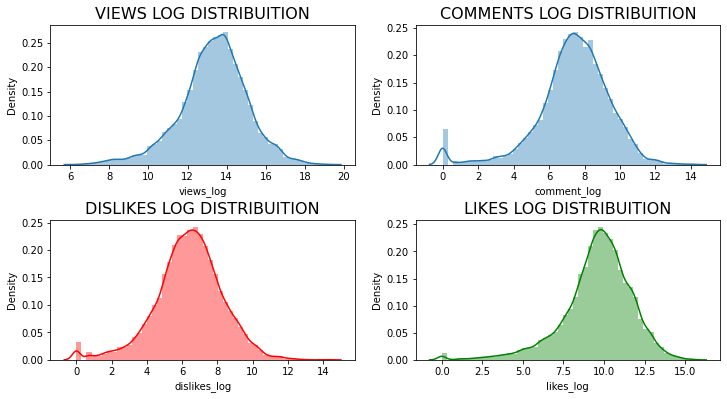

In [47]:
New_table['likes_log'] = np.log(New_table['likes'] + 1)
New_table['views_log'] = np.log(New_table['views'] + 1)
New_table['dislikes_log'] = np.log(New_table['dislikes'] + 1)
New_table['comment_log'] = np.log(New_table['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(New_table['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(New_table['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(New_table['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(New_table['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [48]:
print("Views quantiles")
print(New_table['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(New_table['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(New_table['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(New_table['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [ ]:
New_table["category_id"].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

### **Looking the Views, likes, dislikes distribuition by category_name's**

In [49]:
df_yout = New_table

Category Name count
Entertainment       9964
How to and Style    4146
Comedy              3457
People and Blogs    3210
News & Politics     2487
Name: category_name, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


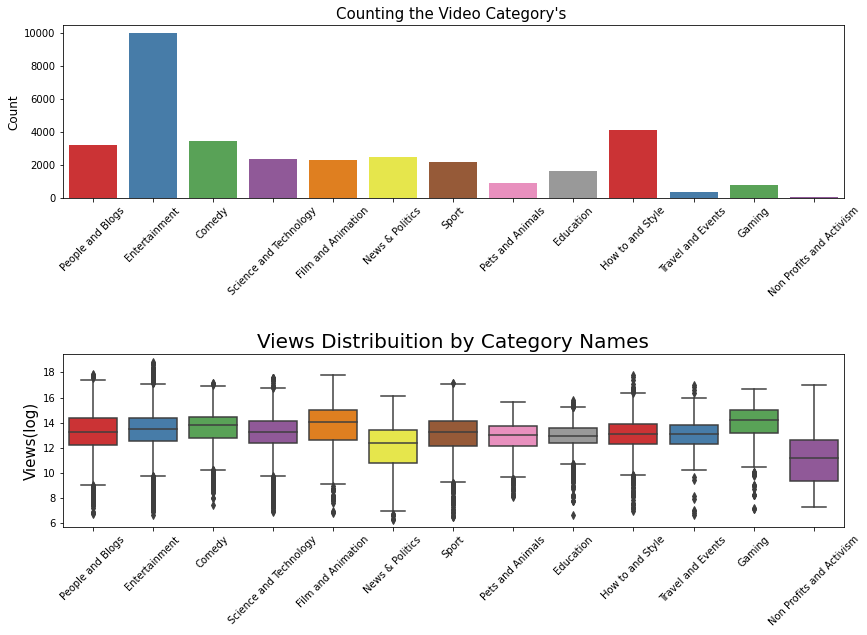

In [50]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)


Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos

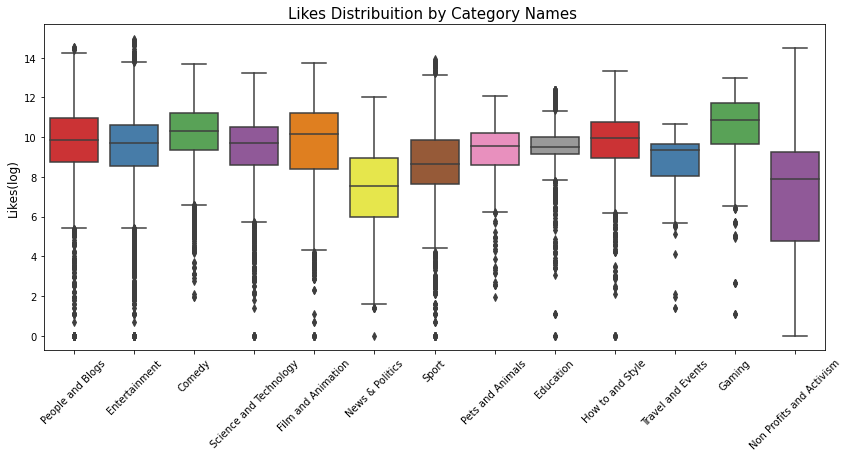

In [51]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

News and Politics have a the same of Non Profits of engagement likes

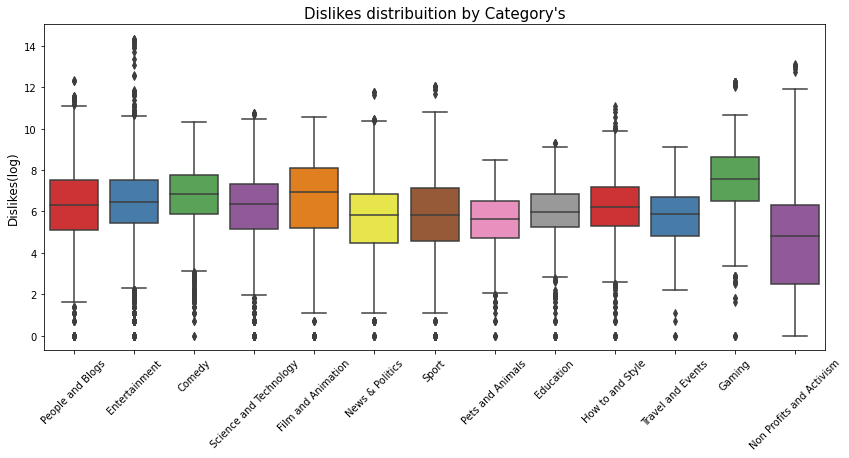

In [52]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

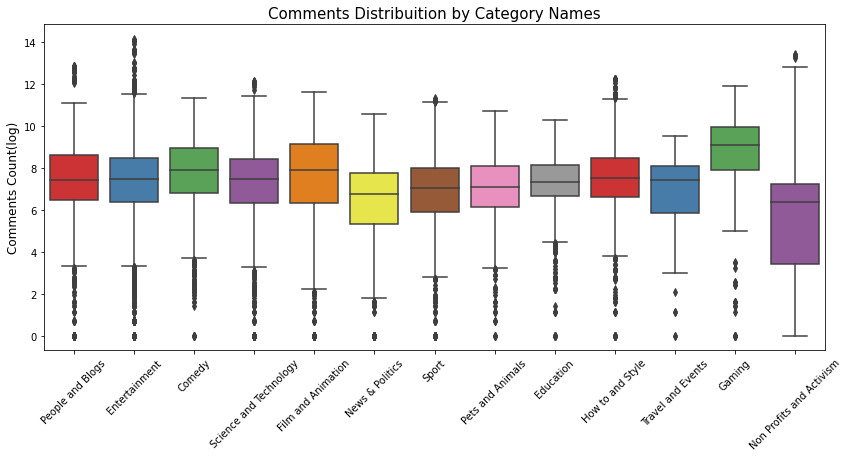

In [53]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

### **Engagement Features**
I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [54]:
df_yout['like_rate'] =  df_yout ['likes'] / df_yout['views'] * 100
df_yout['dislike_rate'] =  df_yout ['dislikes'] / df_yout['views'] * 100
df_yout['comment_rate'] =  df_yout ['comment_count'] / df_yout['views'] * 100

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

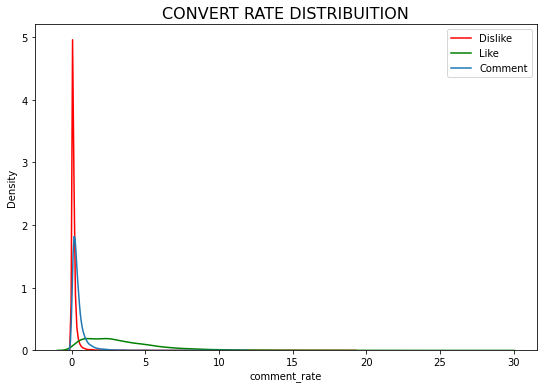

In [55]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_yout['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_yout['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_yout['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences

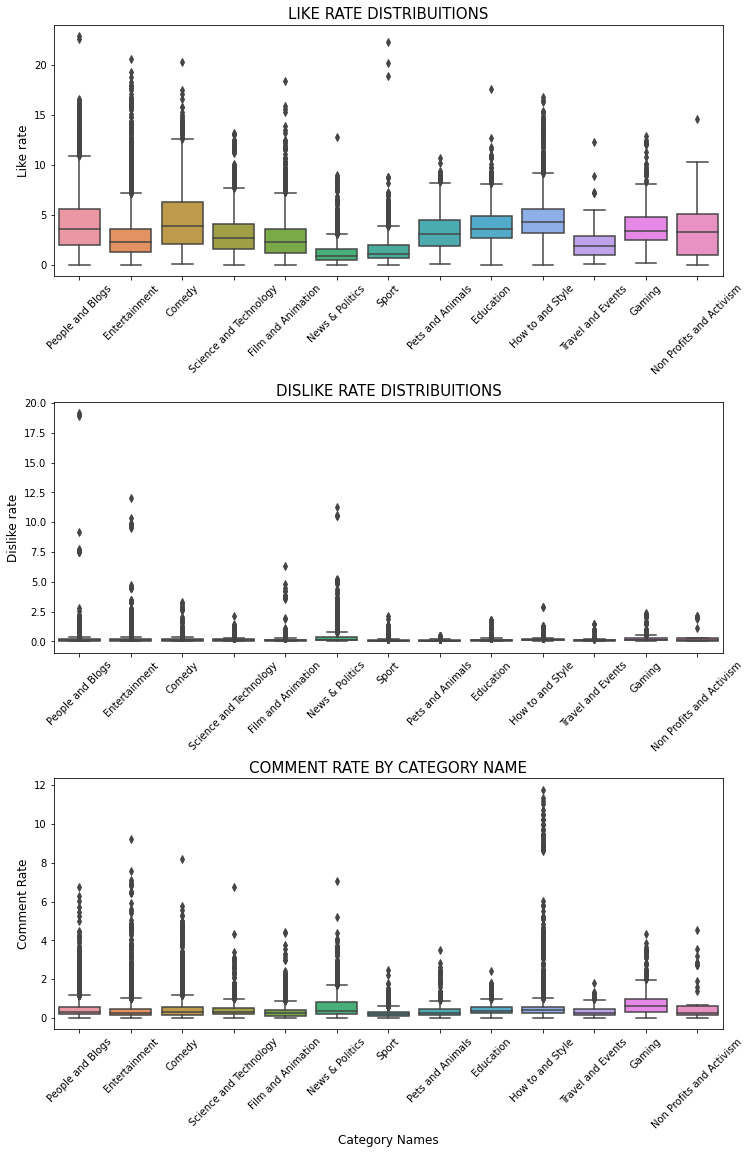

In [56]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_yout)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_yout)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_yout)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal"

The mean of ike distribuition is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.

And at the Comment rate we can see the how-to category with the highest rates of commments. Interesting because isn't politics LOL

Looking through the anothers categoricals variables \
We have the variables:
* Comments Disable
* Rating disable
* Video error

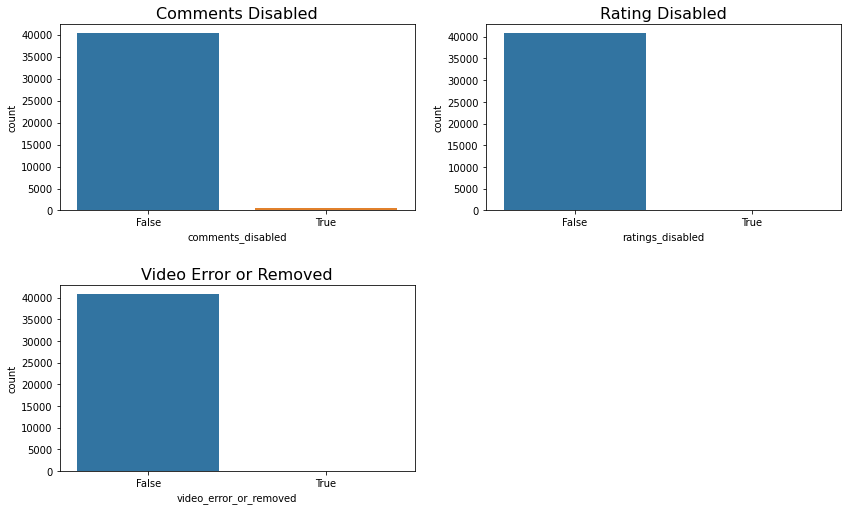

In [57]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_yout)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_yout)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_yout)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

### Let's look the kde of this variables separated to deep understand them

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

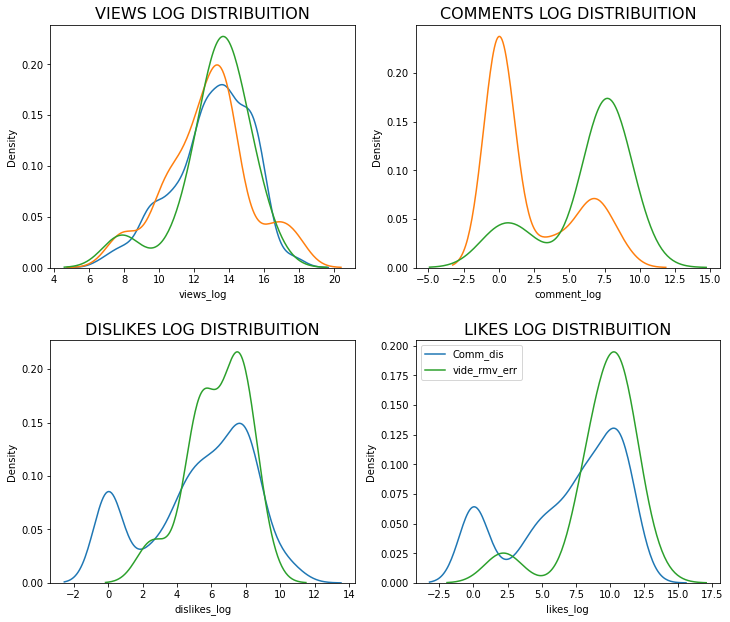

In [58]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

Removed videos no have some views until be moreved...\
Rating disable and Comments disable have the same distribuition

### Analysing the Correlation Matrix of the numerical variables

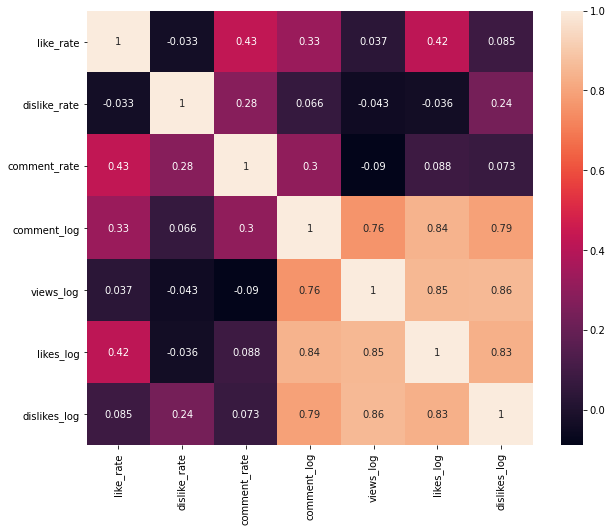

In [59]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_yout[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

### I will start creating some features from texts using Title and Tags columns

### **Visualizing the Word Cloud of Tagged videos**
* Ratings Disable
* Comments Disable
* Video Error or Removed

In [62]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

#### Rating Disabled

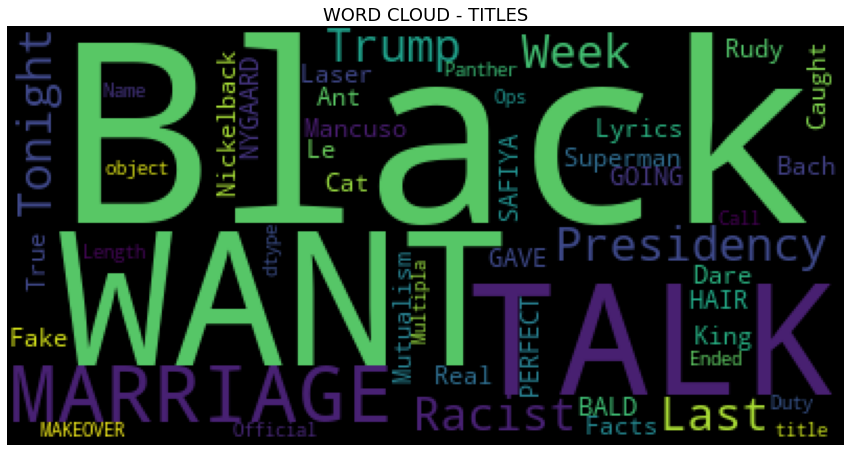

In [63]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Comments Disabled

**General Title Word Cloud**

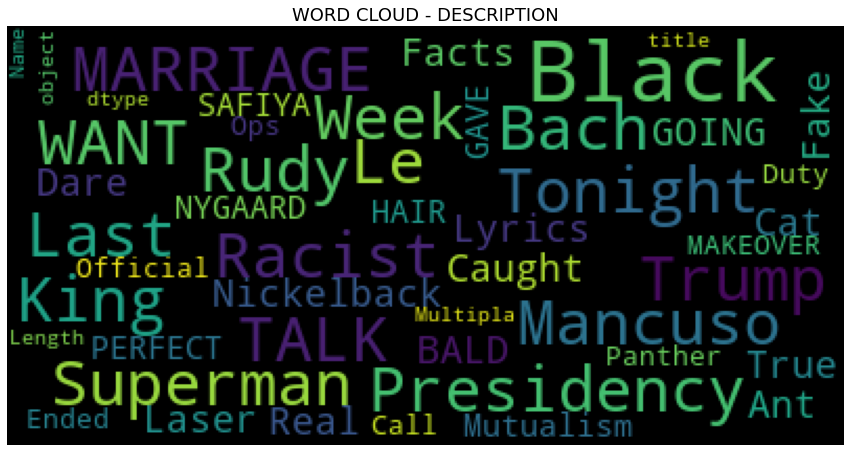

In [64]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

#### Visualizing the WordCloud of Description

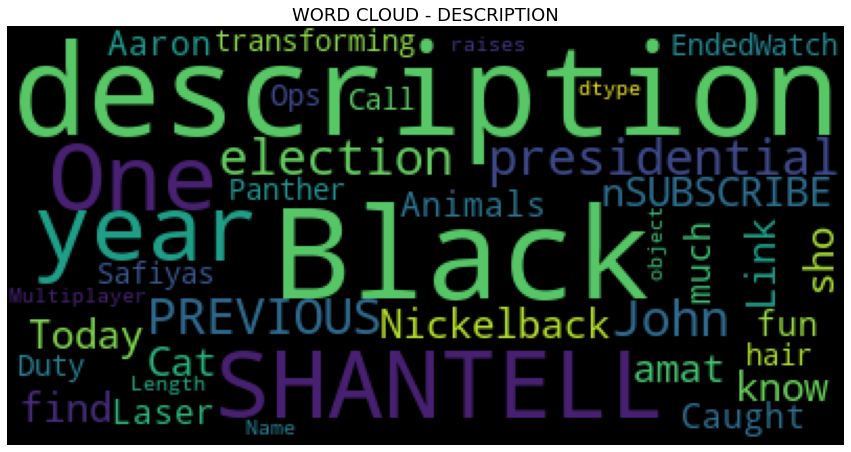

In [65]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

#### Analysing the Wordcloud of Tags

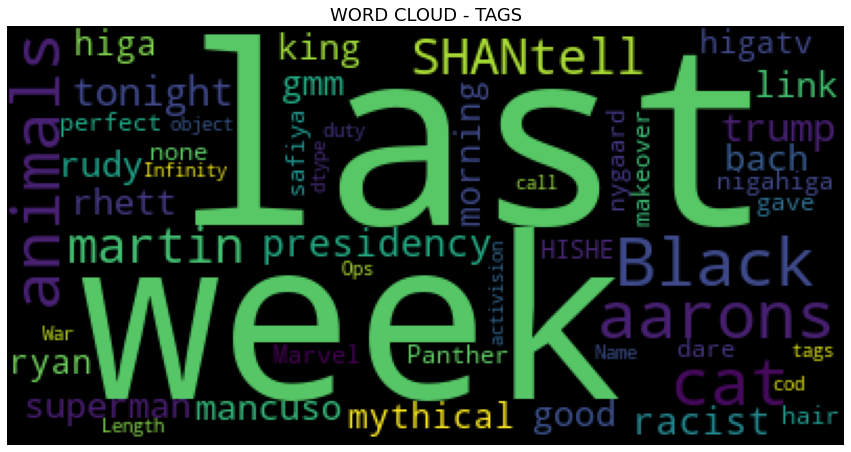

In [66]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()